<a href="https://colab.research.google.com/github/SrishtiK1112/Projects/blob/main/Stock_Price_Prediction_using_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1️⃣ Remove conflicting installs
!pip uninstall -y numpy pmdarima

# 2️⃣ Install a stable numpy version compatible with pmdarima
!pip install numpy==1.26.4

# 3️⃣ Install pmdarima without caching (forces fresh wheel download)
!pip install --no-cache-dir pmdarima==2.0.4


Found existing installation: numpy 2.3.2
Uninstalling numpy-2.3.2:
  Successfully uninstalled numpy-2.3.2
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 103.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.1 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incomp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 93.1 MB/s eta 0:00:00


In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
stock_data = pd.read_csv(
    '/content/ACGLO_stock_data.csv',
    sep=',',
    index_col='Date',
    parse_dates=['Date'],
    date_parser=lambda dates: pd.to_datetime(dates, format='%d-%m-%Y')  ).fillna(0)
stock_data

,Open,High,Low,Close,Adjclose,Volume,Ticker
Date,,,,,,,
2017-08-21,24.886999,25.049999,24.799999,24.990000,16.914204,174800,ACGLO
2017-08-22,25.000000,25.040001,24.950001,24.980000,16.907434,256100,ACGLO
2017-08-23,25.010000,25.080999,24.969999,25.070000,16.968351,119100,ACGLO
2017-08-24,25.030001,25.100000,25.010000,25.020000,16.934509,175600,ACGLO
2017-08-25,25.059999,25.070000,25.010000,25.049999,16.954813,83000,ACGLO
...,...,...,...,...,...,...,...
2024-06-13,22.549999,22.580000,22.340000,22.410000,22.069000,16800,ACGLO
2024-06-14,22.180000,22.250000,22.070000,22.070000,22.070000,16200,ACGLO
2024-06-17,22.139999,22.142000,21.990000,22.020000,22.020000,15500,ACGLO


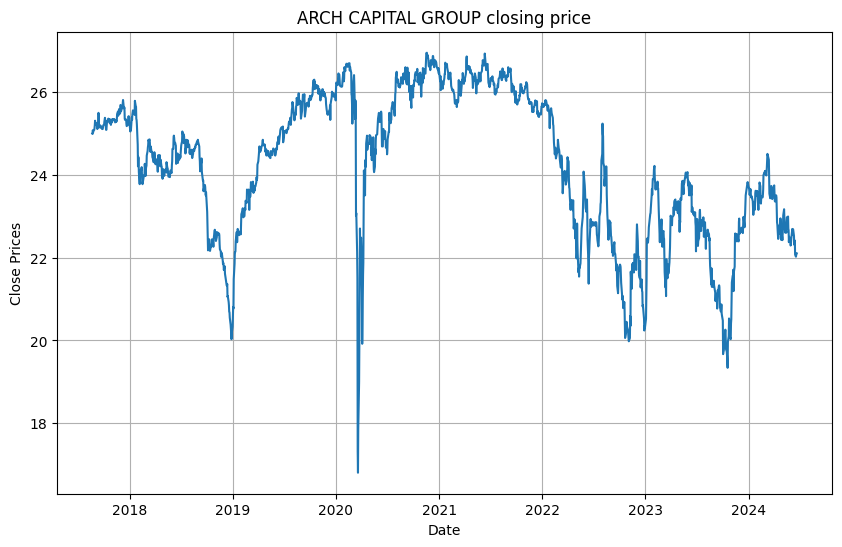

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

<Axes: ylabel='Density'>

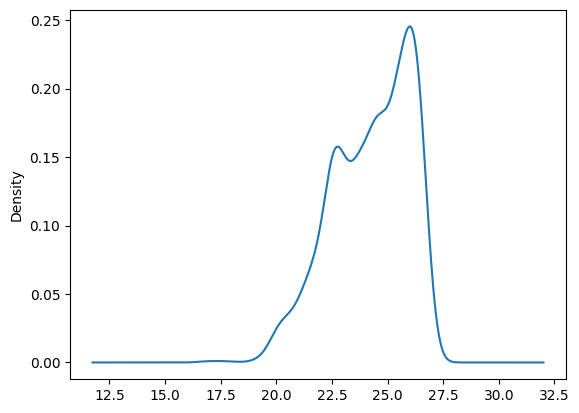

In [ ]:
#Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')

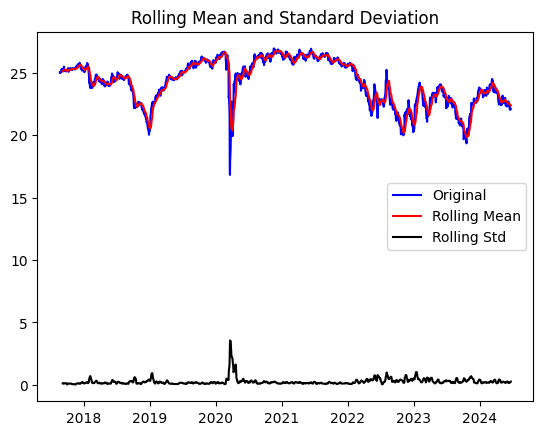

Results of dickey fuller test
Test Statistics                  -2.511352
p-value                           0.112737
No. of lags used                 20.000000
Number of observations used    1698.000000
critical value (1%)              -3.434207
critical value (5%)              -2.863244
critical value (10%)             -2.567677
dtype: float64


In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Axes: ylabel='Density'>

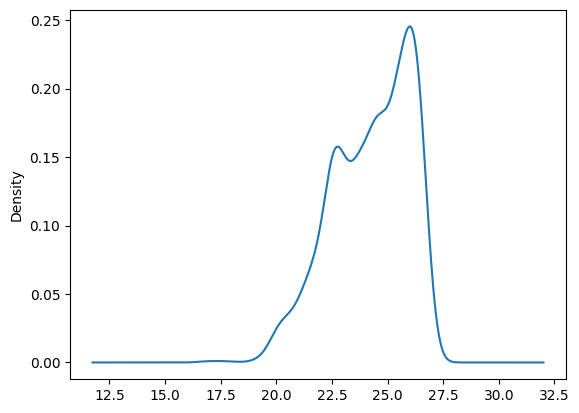

In [ ]:
#Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')

<Figure size 640x480 with 0 Axes>

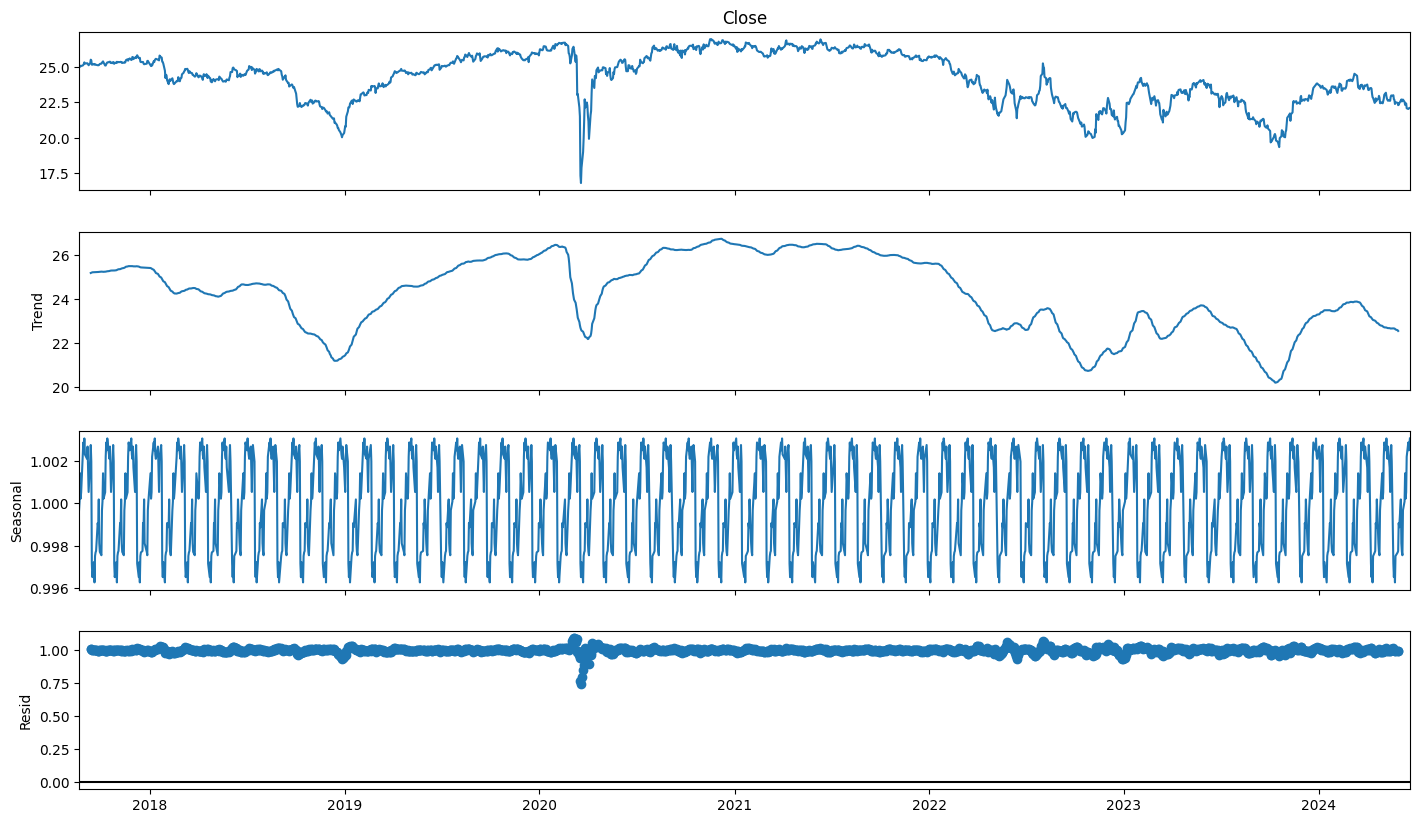

In [ ]:
#To separate the trend and the seasonality from a time series,
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

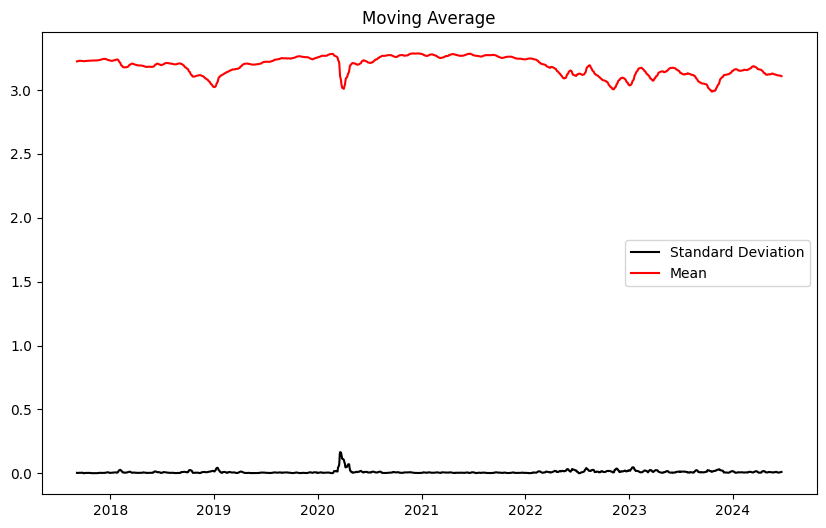

In [ ]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

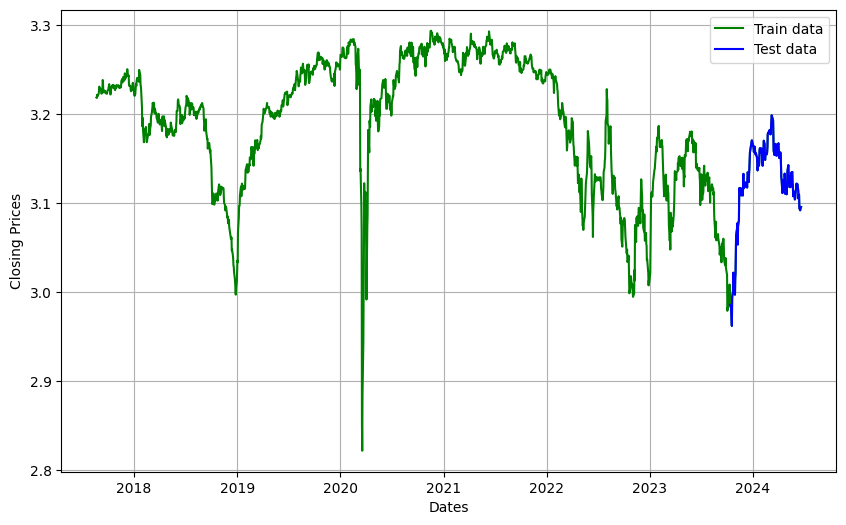

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9505.577, Time=0.50 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9531.696, Time=0.75 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9528.167, Time=2.85 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9507.328, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9535.690, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-9534.147, Time=1.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9534.042, Time=0.95 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9533.192, Time=0.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-9532.121, Time=1.16 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-9537.522, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-9533.506, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-9535.973, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-9535.872, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-9535.040, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0

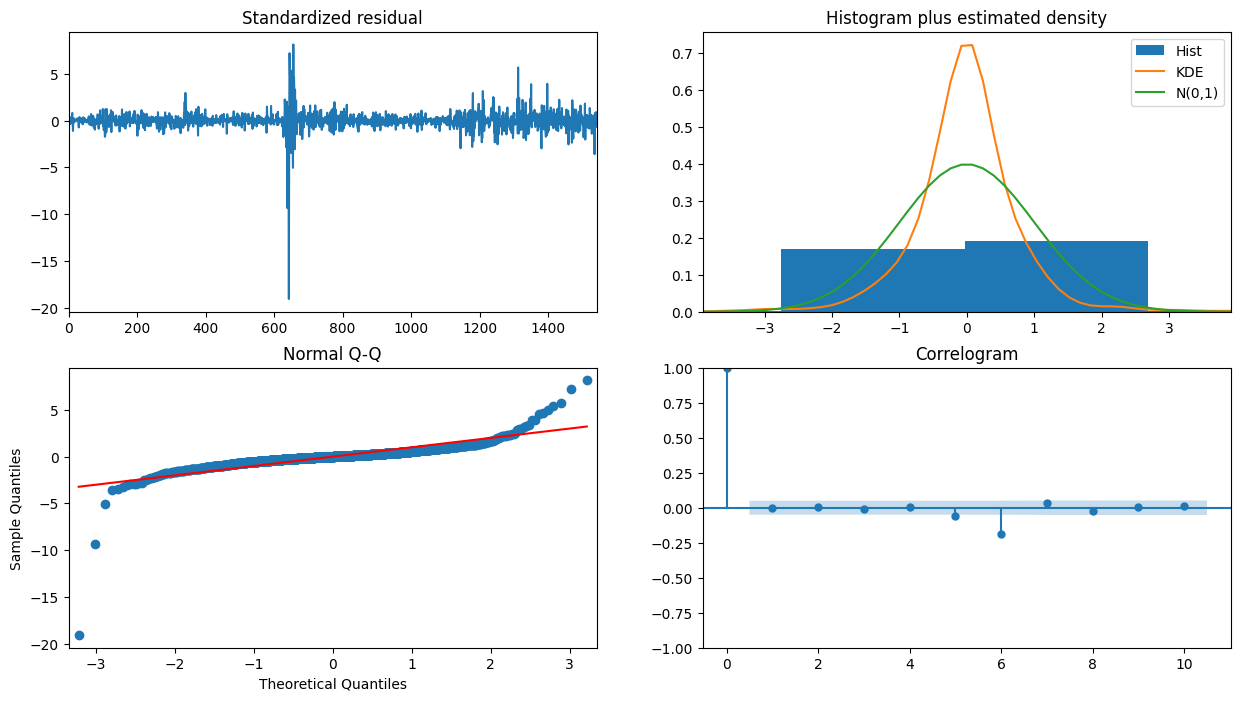

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(2,1,0))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1544
Model:                 ARIMA(2, 1, 0)   Log Likelihood                4771.761
Date:                Mon, 11 Aug 2025   AIC                          -9537.522
Time:                        20:31:10   BIC                          -9521.497
Sample:                             0   HQIC                         -9531.561
                               - 1544                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1262      0.013      9.841      0.000       0.101       0.151
ar.L2          0.0624      0.007      9.464      0.000       0.050       0.075
sigma2         0.0001    6.9e-07    174.745      0.0

In [ ]:
#Forecast 321 steps ahead
forecast_obj = fitted.get_forecast(steps=321)

# Extract predicted mean
fc = forecast_obj.predicted_mean

# Extract confidence intervals#
conf = forecast_obj.conf_int(alpha=0.05)

# Convert to Series (align with your test_data index)
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test_data.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test_data.index)

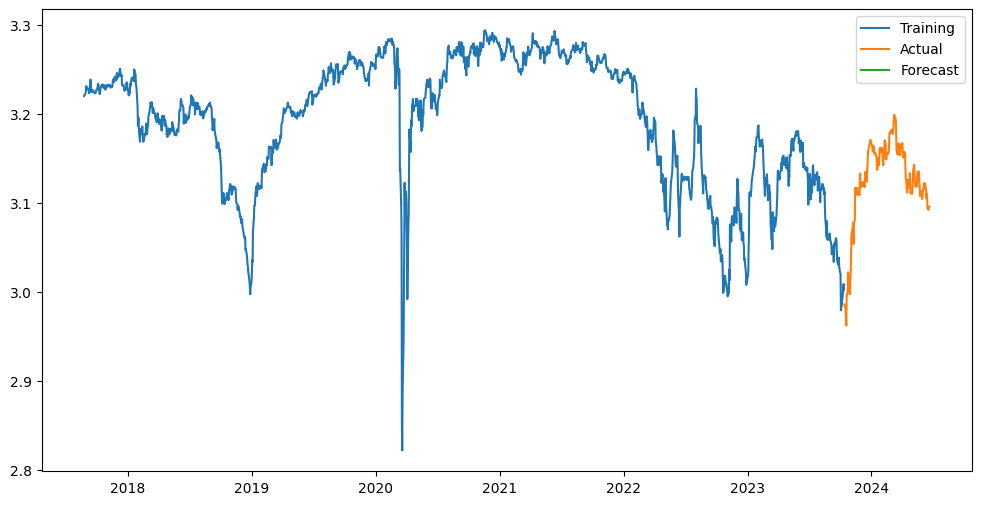

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train_data, label='Training')
plt.plot(test_data, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.1)
plt.legend()
plt.show()

In [ ]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

ValueError: Found input variables with inconsistent numbers of samples: [172, 321]